<a href="https://colab.research.google.com/github/eudesmcf/Movikids/blob/main/Verificador_de_Quadrantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de Bibliotecas e Diretorios

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import pandas as pd
import os
import numpy as np



In [ ]:
# Obtém o diretório atual
current_dir = os.getcwd()

# Carrega os arquivos enviados pelo usuário
uploaded = files.upload()

for filename in uploaded.keys():
    # Obtém o caminho absoluto completo do arquivo enviado pelo usuário
    abs_path_uploaded = os.path.abspath(filename)

    # Obtém o nome do arquivo enviado pelo usuário
    basename = os.path.basename(filename)

    # Cria o caminho absoluto completo do arquivo existente
    abs_path_existing = os.path.join(current_dir, basename)

    # Verifica se o arquivo já existe
    if os.path.exists(abs_path_existing):
        # Obtém o caminho absoluto completo do arquivo existente
        abs_path_existing = os.path.abspath(abs_path_existing)
        if abs_path_uploaded == abs_path_existing:
            print(f'O arquivo {basename} já existe e será sobrescrito.')
        else:
            print(f'O arquivo {basename} já existe com um caminho diferente. Ele não será sobrescrito.')
            continue
    
    # Lê o arquivo enviado pelo usuário
    image = cv2.imread('/content/Teste.png')
    
    # Sobrescreve o arquivo existente ou cria um novo arquivo
    cv2.imwrite(abs_path_existing, image, [cv2.IMWRITE_EXR_TYPE, 0])
    
    print(f'O arquivo {basename} foi carregado com sucesso.')

Saving Teste.png to Teste (1).png
O arquivo Teste.png já existe e será sobrescrito.
O arquivo Teste.png foi carregado com sucesso.


#Criação de Quadrante

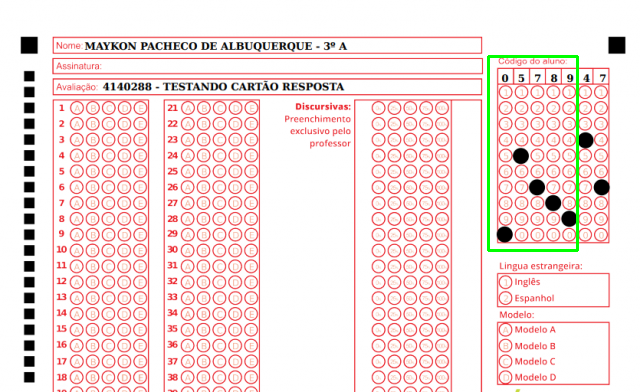

In [ ]:
# Carrega o modelo
img_modelo = cv2.imread('/content/Teste.png')

# Carrega a para comparar
img2 = cv2.imread('/content/Teste2.png')

# obter dimensões da imagem
height, width, channels = image.shape

# definir coordenadas manualmente
left = 488
top = 250
right = 577
bottom = 56

# desenhar retângulo na imagem
cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), thickness=2)

# mostrar imagem com retângulo
cv2_imshow(image)

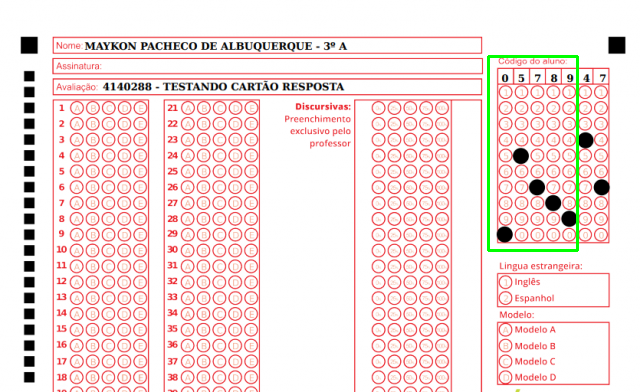

In [ ]:
# definir coordenadas manualmente
left = 488
top = 56
right = 577
bottom = 250

# ajustar coordenadas para corresponder às dimensões da imagem
if left < 0:
    left = 0
if top < 0:
    top = 0
if right > width:
    right = width
if bottom > height:
    bottom = height

# desenhar retângulo na imagem
cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), thickness=2)

# mostrar imagem com retângulo e contornos
cv2_imshow(image)

Contornos encontrados dentro do retângulo: 0


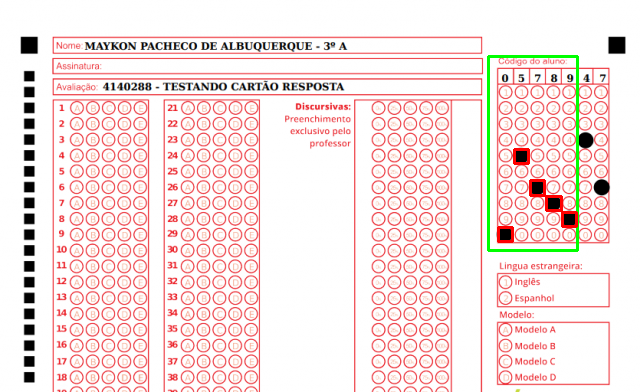

In [ ]:
# converter imagem para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# separar pixels pretos dentro do retângulo usando um threshold
roi = gray[top:bottom, left:right]
_, thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# desenhar contornos dos pixels pretos na imagem original
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (left + x, top + y), (left + x + w, top + y + h), (0, 0, 255), thickness=2)

# contar pixels pretos dentro do retângulo
black_pixels = cv2.countNonZero(thresh)

# contar contornos dentro do retângulo
num_contours = len(contours)

print(f"Contornos encontrados dentro do retângulo: {num_contours}")

# mostrar imagem com retângulo e contornos
cv2_imshow(image)

#Quadrante na Imagem nova

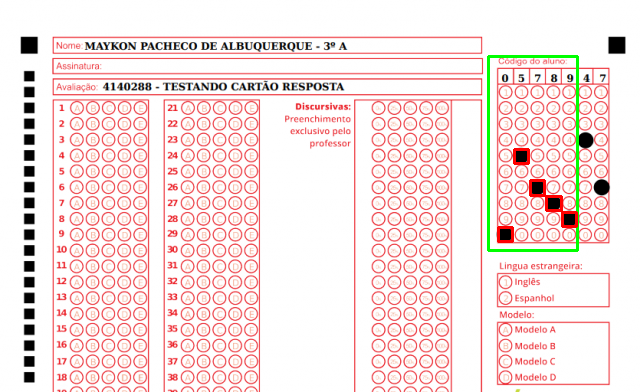

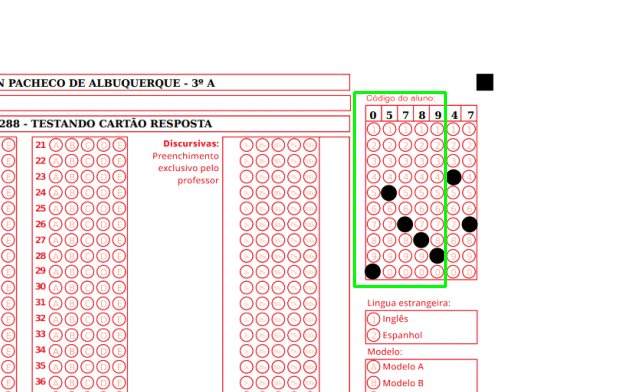

In [ ]:
# Carrega a primeira imagem
img1 = image

# Carrega a segunda imagem
img2 = cv2.imread('/content/Teste2.png')

# Cria o detector ORB
orb = cv2.ORB_create()

# Detecta as características e descritores da primeira imagem
kp1, des1 = orb.detectAndCompute(img1, None)

# Detecta as características e descritores da segunda imagem
kp2, des2 = orb.detectAndCompute(img2, None)

# Cria o objeto Matcher
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontra as correspondências entre as características das duas imagens
matches = matcher.match(des1, des2)

# Filtra as correspondências para manter apenas as boas
good_matches = []
for m in matches:
    if m.distance < 50:
        good_matches.append(m)

# Seleciona os pontos correspondentes nas duas imagens
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

# Encontra a transformação que mapeia pontos da primeira imagem para a segunda imagem
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# obter dimensões da imagem
height, width, channels = img1.shape

# definir coordenadas manualmente
left = 488
top = 250
right = 577
bottom = 56

# transformar as coordenadas da primeira imagem para a segunda imagem
pts = np.array([[[left, top]], [[right, top]], [[right, bottom]], [[left, bottom]]], dtype=np.float32)
dst = cv2.perspectiveTransform(pts, M)

# arredondar as coordenadas transformadas para inteiros
dst = np.int32(dst)

# desenhar retângulo na imagem de saída
out_img = img2.copy()
cv2.rectangle(out_img, (dst[0][0][0], dst[0][0][1]), (dst[2][0][0], dst[2][0][1]), (0, 255, 0), thickness=2)

# mostrar imagem original
cv2_imshow(image)

# mostrar imagem de saída
cv2_imshow(out_img)




# Comparações

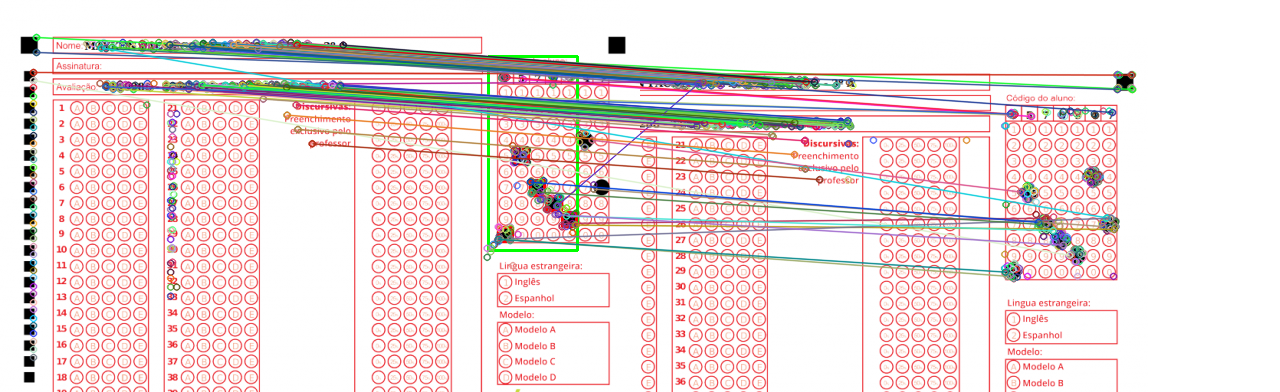

In [ ]:
# Carrega a primeira imagem
img1 = image

# Carrega a segunda imagem
img2 = cv2.imread('/content/Teste2.png')

# Cria o detector ORB
orb = cv2.ORB_create()

# Detecta as características e descritores da primeira imagem
kp1, des1 = orb.detectAndCompute(img1, None)

# Detecta as características e descritores da segunda imagem
kp2, des2 = orb.detectAndCompute(img2, None)

# Cria o objeto Matcher
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontra as correspondências entre as características das duas imagens
matches = matcher.match(des1, des2)

# Filtra as correspondências para manter apenas as boas
good_matches = []
for m in matches:
    if m.distance < 50:
        good_matches.append(m)

# Desenha as correspondências na imagem de saída
out_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)

# Exibe a imagem de saída
cv2_imshow(out_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

